In [ ]:
# Import required dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBClassifier 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
import pipeline_utilities as p_utils
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from scipy.stats import chi2_contingency



In [5]:
# Import data
file_path = 'Resources/summer.csv'
df = pd.read_csv(file_path)
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [6]:
#Get info on all features and target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [7]:
df = df.dropna()

In [9]:
X = df.copy().drop(columns="Medal")
X.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors


In [29]:
y = df["Medal"].values.reshape(-1,1)
y[0:5]

array([['Gold'],
       ['Silver'],
       ['Bronze'],
       ['Gold'],
       ['Silver']], dtype=object)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
X_train

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event
27204,2008,Beijing,Aquatics,Diving,"FISCHER, Heike",GER,Women,Synchronized Diving 3M Springboard
5290,1928,Amsterdam,Equestrian,Jumping,"BJÖRNSTJERNA, Carl",SWE,Men,Team
21990,1996,Atlanta,Canoe / Kayak,Canoe / Kayak F,"ROBINSON, Clint",AUS,Men,K-1 1000M (Kayak Single)
1873,1908,London,Tennis,Tennis,"GORE, Arthur Wentworth",GBR,Men,Singles Indoor
14967,1976,Montreal,Rowing,Rowing,"BRYUNINA, Mira",URS,Women,Quadruple Sculls With Coxswain (4X)
...,...,...,...,...,...,...,...,...
29803,2012,London,Basketball,Basketball,"JAMES, Lebron",USA,Men,Basketball
5390,1928,Amsterdam,Football,Football,"BIDOGLIO, Ludovico",ARG,Men,Football
860,1904,St Louis,Fencing,Fencing,"TATHAM, Charles",CUB,Men,Épée Individual
15795,1980,Moscow,Fencing,Fencing,"KARAGIAN, Ashot",URS,Men,Épée Team


In [17]:
X_test

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event
96,1896,Athens,Gymnastics,Artistic G.,"KARVELAS, Phillippos",GRE,Men,"Team, Parallel Bars"
13664,1972,Munich,Rowing,Rowing,"LUDWIG, Klaus-Dieter",GDR,Men,Four-Oared Shell With Coxswain (4-)
9266,1956,Melbourne / Stockholm,Cycling,Cycling Track,"FOUSEK, Ladislav",TCH,Men,2000M Tandem
7403,1948,London,Athletics,Athletics,"LEYMAN, Ann-Britt",SWE,Women,Long Jump
10256,1960,Rome,Fencing,Fencing,"BRECHT, Jürgen",EUA,Men,Foil Team
...,...,...,...,...,...,...,...,...
8941,1956,Melbourne / Stockholm,Aquatics,Swimming,"HAPPE-KREY, Ursula",EUA,Women,200M Breaststroke
5345,1928,Amsterdam,Fencing,Fencing,"SARROCCHI, Giulio",ITA,Men,Sabre Team
23716,2000,Sydney,Badminton,Badminton,"XIA, Xuanze",CHN,Men,Singles
14735,1976,Montreal,Handball,Handball,"PASKUY, Eva",GDR,Women,Handball


In [26]:
y_train

array([['Bronze'],
       ['Bronze'],
       ['Bronze'],
       ...,
       ['Silver'],
       ['Bronze'],
       ['Silver']], dtype=object)

In [20]:
y_test

array([['Bronze'],
       ['Silver'],
       ['Silver'],
       ...,
       ['Bronze'],
       ['Silver'],
       ['Bronze']], dtype=object)

/opt/homebrew/anaconda3/envs/dev/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Year', ylabel='Medal'>

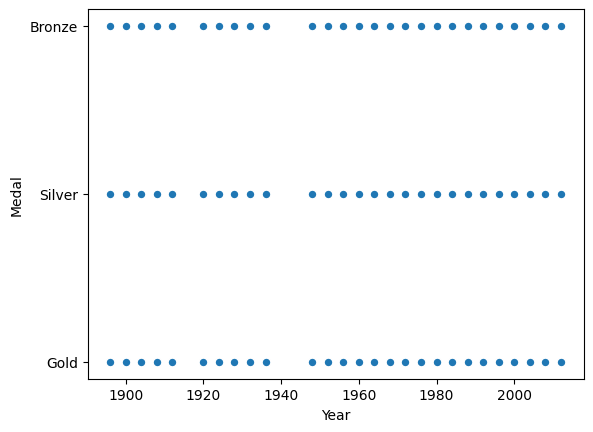

In [31]:
df.plot.scatter(
    x='Year',
    y='Medal',
    marker='o',
    s=40,
    edgecolor='w',
    colormap='plasma'
)

In [ ]:
#data exploration - module 12 activities

# p_value evaluation
# Z score
# histogram
# plotting
# heatmap

In [33]:
df = pd.read_csv(file_path)
df.corr(numeric_only=True)

,Year
Year,1.0


In [34]:
df.Sport.corr(df.Gender)

ValueError: could not convert string to float: 'Aquatics'

In [5]:
#drop unnecessary columns   
clean_df = p_utils.drop_columns(df)
clean_df.head()

,Year,Sport,Country,Gender,Medal
0,1896,Aquatics,HUN,Men,Gold
1,1896,Aquatics,AUT,Men,Silver
2,1896,Aquatics,GRE,Men,Bronze
3,1896,Aquatics,GRE,Men,Gold
4,1896,Aquatics,GRE,Men,Silver


In [3]:
#get medal count by country, sport, gender and medal groupings
medal_ct_country = df.groupby(['Country','Sport','Gender','Medal']).agg(Medal_count=('Medal','count')).sort_values('Medal_count', ascending=False).reset_index()
medal_ct_country.head()


,Country,Sport,Gender,Medal,Medal_count
0,USA,Athletics,Men,Gold,382
1,USA,Aquatics,Men,Gold,319
2,USA,Aquatics,Women,Gold,259
3,USA,Athletics,Men,Silver,240
4,USA,Aquatics,Men,Silver,188


In [4]:
p_utils.medal_model_generator(medal_ct_country)

Testing Linear Regression
Mean Squared Error: 269.31503223059843
R-squared: 0.22481931857463744
Adjusted R-squared: 0.22078716938646914


/opt/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Testing Random Forest Regressor
Mean Squared Error: 168.9391525839793
R-squared: 0.4285833316132802
Adjusted R-squared: 0.42561107326016334
Testing XGB Regressor
Mean Squared Error: 140.0057771730882
R-squared: 0.6751101691795114
Adjusted R-squared: 0.6734202350790146
XGB Regressor is the best model


Pipeline(steps=[('One hot encode', OneHotEncoder(handle_unknown='ignore')),
                ('XGB Regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [7]:
# columns_to_encode = ['Sport','Country','Gender']

In [8]:
# # Create an encoder for the categorical columns
# ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# # Set up the OneHotEncoder so it will transform to Pandas
# ohe.set_output(transform="pandas")

# # Fit and transform the OneHotEncoder to the columns to encode
# medals_data_ohe = ohe.fit_transform(clean_df[columns_to_encode])
# medals_data_ohe.head()

,Sport_Archery,Sport_Athletics,Sport_Badminton,Sport_Baseball,Sport_Basketball,Sport_Basque Pelota,Sport_Boxing,Sport_Canoe,Sport_Canoe / Kayak,Sport_Cricket,...,Country_USA,Country_UZB,Country_VEN,Country_VIE,Country_YUG,Country_ZAM,Country_ZIM,Country_ZZX,Country_nan,Gender_Women
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# # Create an encoder for the categorical ordinal Medal
# medal_ord_enc = OrdinalEncoder(categories=[['Gold','Silver','Bronze']],
#                                             encoded_missing_value=-1, 
#                                             handle_unknown='use_encoded_value', 
#                                             unknown_value=-1)
# # Set up the OneHotEncoder so it will transform to Pandas
# medal_ord_enc.set_output(transform="pandas")


# # Fit and transform the OneHotEncoder to the columns to encode
# medal_ord_enc = medal_ord_enc.fit_transform(clean_df[['Medal']])
# medal_ord_enc.head()


In [ ]:
# # Create an encoder for the categorical ordinal column for 
# medal_ord_enc = OrdinalEncoder(categories=[['Gold','Silver','Bronze']],
#                                             encoded_missing_value=-1, 
#                                             handle_unknown='use_encoded_value', 
#                                             unknown_value=-1)
# # Set up the OneHotEncoder so it will transform to Pandas
# medal_ord_enc.set_output(transform="pandas")


# # Fit and transform the OneHotEncoder to the columns to encode
# medal_ord_enc = medal_ord_enc.fit_transform(clean_df[['Medal']])
# medal_ord_enc.head()

In [10]:
# #concat above dataframes
# df_enc = pd.concat([medals_data_ohe,medal_ord_enc],axis=1)
# df_enc.head()